In [71]:
pip install basketball_reference_web_scraper

Note: you may need to restart the kernel to use updated packages.


## The goal of this is to identify which nba statistic is the best statistic that identifies the top players in the NBA

In [72]:
# This imports the client
from basketball_reference_web_scraper import client

In [73]:
from basketball_reference_web_scraper import client

# Get 2017-2018 advanced season statistics for all players
data = client.players_advanced_season_totals(season_end_year=2020)

# The players_advanced_season_totals method also supports all output behavior previously described


from basketball_reference_web_scraper import client

# Get 2017-2018 season totals for all players
data2 = client.players_season_totals(season_end_year=2018)

# The players_season_totals method also supports all output behavior previously described

In [74]:
# load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
#Turn numpy array into dataframe
nba = pd.DataFrame(data=data, index=None)
nba.head(5)

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,adamsst01,Steven Adams,[Position.CENTER],26,Team.OKLAHOMA_CITY_THUNDER,42,1125,21.3,0.608,0.003,...,13.7,17.2,3.0,1.7,4.6,0.198,1.6,3.3,4.9,2.0
1,adebaba01,Bam Adebayo,[Position.POWER_FORWARD],22,Team.MIAMI_HEAT,46,1588,20.6,0.624,0.023,...,18.0,19.9,3.6,2.5,6.2,0.186,1.2,3.8,5.0,2.8
2,aldrila01,LaMarcus Aldridge,[Position.CENTER],34,Team.SAN_ANTONIO_SPURS,43,1426,20.8,0.590,0.189,...,7.9,22.8,3.2,1.2,4.4,0.148,1.7,0.6,2.3,1.6
3,alexani01,Nickeil Alexander-Walker,[Position.SHOOTING_GUARD],21,Team.NEW_ORLEANS_PELICANS,37,487,8.7,0.450,0.523,...,13.0,22.8,-0.5,0.2,-0.3,-0.025,-3.3,-2.2,-5.5,-0.4
4,allengr01,Grayson Allen,[Position.SHOOTING_GUARD],24,Team.MEMPHIS_GRIZZLIES,30,498,11.5,0.577,0.517,...,10.7,17.9,0.5,0.1,0.6,0.059,-0.7,-2.9,-3.6,-0.2


In [76]:
#Check the data types
nba.dtypes

slug                              object
name                              object
positions                         object
age                                int64
team                              object
games_played                       int64
minutes_played                     int64
player_efficiency_rating         float64
true_shooting_percentage         float64
three_point_attempt_rate         float64
free_throw_attempt_rate          float64
offensive_rebound_percentage     float64
defensive_rebound_percentage     float64
total_rebound_percentage         float64
assist_percentage                float64
steal_percentage                 float64
block_percentage                 float64
turnover_percentage              float64
usage_percentage                 float64
offensive_win_shares             float64
defensive_win_shares             float64
win_shares                       float64
win_shares_per_48_minutes        float64
offensive_box_plus_minus         float64
defensive_box_pl

In [77]:
#Check num values
nba.isnull().sum()

slug                             0
name                             0
positions                        0
age                              0
team                             0
games_played                     0
minutes_played                   0
player_efficiency_rating         0
true_shooting_percentage         0
three_point_attempt_rate         0
free_throw_attempt_rate          0
offensive_rebound_percentage     0
defensive_rebound_percentage     0
total_rebound_percentage         0
assist_percentage                0
steal_percentage                 0
block_percentage                 0
turnover_percentage              0
usage_percentage                 0
offensive_win_shares             0
defensive_win_shares             0
win_shares                       0
win_shares_per_48_minutes        0
offensive_box_plus_minus         0
defensive_box_plus_minus         0
box_plus_minus                   0
value_over_replacement_player    0
dtype: int64

#### Notice that data is clean!

### Exploratory Analysis

#### Now, I would like to look at some features that interact well with PER statistics. PER has become the most commonly used advanced metric. PER measures a player's per-minute productivity.  

#### PER takes into account accomplishments, such as field goals, 3-pointers, assists, rebounds, blocks and steals, and negative results, such as missed shots, turnovers and personal fouls. Top players can generally be found at the top of the list, so its a nice snapshot of where players stand in relationship to one another.

In [78]:
#Remove players that have not played more than half of the nba games in 2017
nbadata = nba[nba['games_played']>42]
nbadata.head()

,slug,name,positions,age,team,games_played,minutes_played,player_efficiency_rating,true_shooting_percentage,three_point_attempt_rate,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
1,adebaba01,Bam Adebayo,[Position.POWER_FORWARD],22,Team.MIAMI_HEAT,46,1588,20.6,0.624,0.023,...,18.0,19.9,3.6,2.5,6.2,0.186,1.2,3.8,5.0,2.8
2,aldrila01,LaMarcus Aldridge,[Position.CENTER],34,Team.SAN_ANTONIO_SPURS,43,1426,20.8,0.590,0.189,...,7.9,22.8,3.2,1.2,4.4,0.148,1.7,0.6,2.3,1.6
5,allenja01,Jarrett Allen,[Position.CENTER],21,Team.BROOKLYN_NETS,45,1225,20.3,0.660,0.013,...,12.0,15.0,3.2,2.0,5.2,0.205,-0.1,2.9,2.8,1.5
11,antetgi01,Giannis Antetokounmpo,[Position.POWER_FORWARD],25,Team.MILWAUKEE_BUCKS,43,1318,32.7,0.614,0.251,...,12.8,37.8,4.7,3.5,8.2,0.298,7.4,4.9,12.3,4.8
15,anunoog01,OG Anunoby,[Position.SMALL_FORWARD],22,Team.TORONTO_RAPTORS,45,1319,12.7,0.579,0.422,...,11.9,15.3,1.0,2.2,3.2,0.116,-0.7,2.2,1.4,1.1


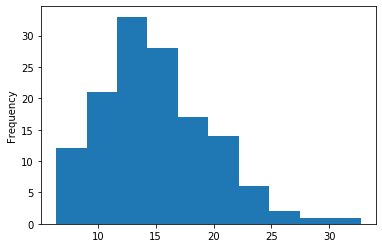

In [79]:
nbadata['player_efficiency_rating'].plot.hist()

In [80]:
from scipy import stats
stats.normaltest(nbadata['player_efficiency_rating'])

NormaltestResult(statistic=14.265218031112433, pvalue=0.0007986330210189268)

#### It is normally distribution because it is greater than 0.05 p-value. 

### Lets look at how player efficiency rating interacts with the other variables.

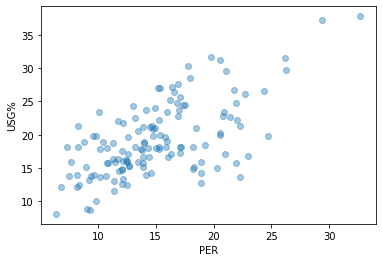

In [81]:
#Interaction with usage rate%
plt.scatter(nbadata['player_efficiency_rating'], nbadata['usage_percentage'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('USG%')
plt.show()

#### This shows a positive correlation between Player Efficiency rating (PER) and Usage Rate % (USG%). Player Efficiency Rating (PER) attempts to boil all the players contribution into one single number. Usage rate is the percentage of team plays that is used by one player while he was on the floor.

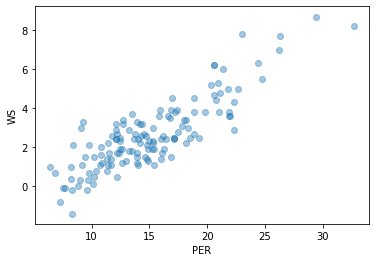

In [82]:
#Interaction with Win Share
plt.scatter(nbadata['player_efficiency_rating'], nbadata['win_shares'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('WS')
plt.show()

#### This shows a slight positive correlation between Player Efficiency rating and Wins Share (WS). Win share is a metric that estimates the number of wins a player produces for his team. 

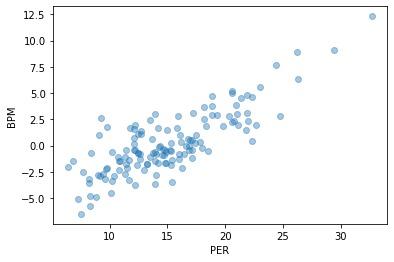

In [83]:
#Interaction with efficiency differential
plt.scatter(nbadata['player_efficiency_rating'], nbadata['box_plus_minus'], alpha=0.4)
plt.xlabel('PER')
plt.ylabel('BPM')
plt.show()

#### This shows a slight positive correlation between Player Efficiency rating and box plus minus (BPM). BPM is a metric for evaluating basketball players' quality and contribution to the team. 

In [84]:
# I Selected this variables because they are the most important advanced statistics and commonly used.
nbaset = nbadata[['name', 'positions', 'team', 'player_efficiency_rating', 'usage_percentage', 'win_shares', 'box_plus_minus', 'value_over_replacement_player']]
nbaset.head()

,name,positions,team,player_efficiency_rating,usage_percentage,win_shares,box_plus_minus,value_over_replacement_player
1,Bam Adebayo,[Position.POWER_FORWARD],Team.MIAMI_HEAT,20.6,19.9,6.2,5.0,2.8
2,LaMarcus Aldridge,[Position.CENTER],Team.SAN_ANTONIO_SPURS,20.8,22.8,4.4,2.3,1.6
5,Jarrett Allen,[Position.CENTER],Team.BROOKLYN_NETS,20.3,15.0,5.2,2.8,1.5
11,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,32.7,37.8,8.2,12.3,4.8
15,OG Anunoby,[Position.SMALL_FORWARD],Team.TORONTO_RAPTORS,12.7,15.3,3.2,1.4,1.1


In [85]:
#Rename the columns
nbaset = nbaset.rename(columns={'player_efficiency_rating':'PER', 'usage_percentage':'USG%','win_shares':'WS','box_plus_minus':'BPM', 'value_over_replacement_player':'VOR'})

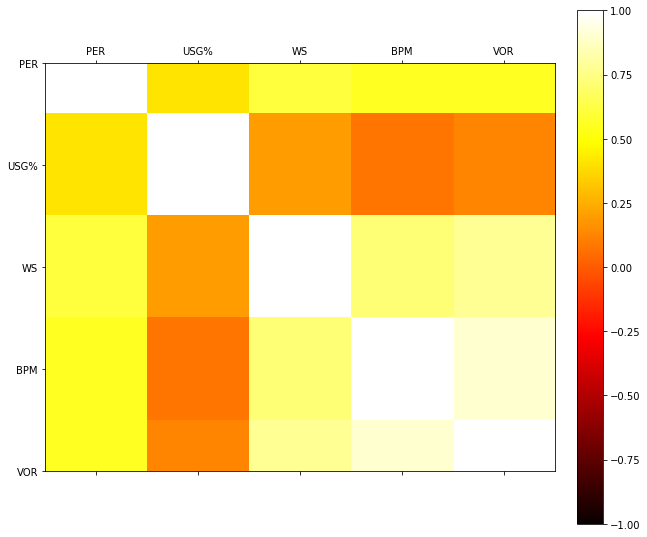

In [86]:
# Obtain figure associated with the plot we want to create
dfCorrelation = nbaset.corr('kendall')
fig = plt.figure()

# Create heatmap subplot  
plot_axes = fig.add_subplot(111) 
heatmap = plot_axes.matshow(dfCorrelation, vmin=-1, vmax=1, cmap='hot')

# Add a colorbar on the right based on the heatmap
fig.colorbar(heatmap, fraction=0.046, pad=0.04)

# Create labels with column names
ticks = np.arange(0, dfCorrelation.columns.size, 1) # create a numpy array from 0 to column size
plot_axes.set_xticks(ticks)
plot_axes.set_yticks(ticks)
plot_axes.set_yticklabels(dfCorrelation.columns.values)
plot_axes.set_xticklabels(dfCorrelation.columns.values)


# Set size
fig.set_size_inches((10,10))

In [87]:
#Sort Values by PER
PER = nbaset.sort_values(by=['PER'], ascending=False)
PER.head(10)

,name,positions,team,PER,USG%,WS,BPM,VOR
11,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,32.7,37.8,8.2,12.3,4.8
195,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.4,37.2,8.7,9.1,4.5
291,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,26.3,29.8,7.7,6.3,3.5
244,LeBron James,[Position.POINT_GUARD],Team.LOS_ANGELES_LAKERS,26.2,31.6,7.0,8.9,4.2
483,Hassan Whiteside,[Position.CENTER],Team.PORTLAND_TRAIL_BLAZERS,24.7,19.8,5.5,2.8,1.6
255,Nikola Jokić,[Position.CENTER],Team.DENVER_NUGGETS,24.4,26.5,6.3,7.7,3.6
175,Rudy Gobert,[Position.CENTER],Team.UTAH_JAZZ,23.0,16.8,7.8,5.6,2.9
198,Montrezl Harrell,[Position.CENTER],Team.LOS_ANGELES_CLIPPERS,22.7,26.1,5.0,2.0,1.4
495,Christian Wood,[Position.POWER_FORWARD],Team.DETROIT_PISTONS,22.3,21.3,2.9,0.4,0.5
407,Mitchell Robinson,[Position.CENTER],Team.NEW_YORK_KNICKS,22.3,13.7,4.3,4.6,1.6


In [88]:
#Sort Values by USG%
USG = nbaset.sort_values(by=['USG%'], ascending=False)
USG.head(10)

,name,positions,team,PER,USG%,WS,BPM,VOR
11,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,32.7,37.8,8.2,12.3,4.8
195,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.4,37.2,8.7,9.1,4.5
280,Zach LaVine,[Position.SHOOTING_GUARD],Team.CHICAGO_BULLS,19.8,31.7,3.8,1.9,1.7
244,LeBron James,[Position.POINT_GUARD],Team.LOS_ANGELES_LAKERS,26.2,31.6,7.0,8.9,4.2
333,Donovan Mitchell,[Position.SHOOTING_GUARD],Team.UTAH_JAZZ,20.6,31.2,4.7,2.2,1.6
130,Spencer Dinwiddie,[Position.SHOOTING_GUARD],Team.BROOKLYN_NETS,17.8,30.4,3.1,0.3,0.8
291,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,26.3,29.8,7.7,6.3,3.5
53,Devin Booker,[Position.SHOOTING_GUARD],Team.PHOENIX_SUNS,21.1,29.6,4.8,2.0,1.6
488,Lou Williams,[Position.SHOOTING_GUARD],Team.LOS_ANGELES_CLIPPERS,18.0,28.5,3.4,-0.2,0.6
396,Julius Randle,[Position.POWER_FORWARD],Team.NEW_YORK_KNICKS,16.9,27.6,1.5,-0.4,0.6


In [89]:
#Sort Values by WS
WS = nbaset.sort_values(by=['WS'], ascending=False)
WS.head(10)

,name,positions,team,PER,USG%,WS,BPM,VOR
195,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.4,37.2,8.7,9.1,4.5
11,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,32.7,37.8,8.2,12.3,4.8
175,Rudy Gobert,[Position.CENTER],Team.UTAH_JAZZ,23.0,16.8,7.8,5.6,2.9
291,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,26.3,29.8,7.7,6.3,3.5
244,LeBron James,[Position.POINT_GUARD],Team.LOS_ANGELES_LAKERS,26.2,31.6,7.0,8.9,4.2
255,Nikola Jokić,[Position.CENTER],Team.DENVER_NUGGETS,24.4,26.5,6.3,7.7,3.6
427,Ben Simmons,[Position.POINT_GUARD],Team.PHILADELPHIA_76ERS,20.6,20.3,6.2,5.2,3.0
1,Bam Adebayo,[Position.POWER_FORWARD],Team.MIAMI_HEAT,20.6,19.9,6.2,5.0,2.8
379,Chris Paul,[Position.POINT_GUARD],Team.OKLAHOMA_CITY_THUNDER,21.4,22.7,6.0,4.5,2.4
483,Hassan Whiteside,[Position.CENTER],Team.PORTLAND_TRAIL_BLAZERS,24.7,19.8,5.5,2.8,1.6


In [90]:
#Sort Values by BPM
BPM = nbaset.sort_values(by=['BPM'], ascending=False)
BPM.head(10)

,name,positions,team,PER,USG%,WS,BPM,VOR
11,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,32.7,37.8,8.2,12.3,4.8
195,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.4,37.2,8.7,9.1,4.5
244,LeBron James,[Position.POINT_GUARD],Team.LOS_ANGELES_LAKERS,26.2,31.6,7.0,8.9,4.2
255,Nikola Jokić,[Position.CENTER],Team.DENVER_NUGGETS,24.4,26.5,6.3,7.7,3.6
291,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,26.3,29.8,7.7,6.3,3.5
175,Rudy Gobert,[Position.CENTER],Team.UTAH_JAZZ,23.0,16.8,7.8,5.6,2.9
427,Ben Simmons,[Position.POINT_GUARD],Team.PHILADELPHIA_76ERS,20.6,20.3,6.2,5.2,3.0
1,Bam Adebayo,[Position.POWER_FORWARD],Team.MIAMI_HEAT,20.6,19.9,6.2,5.0,2.8
318,JaVale McGee,[Position.CENTER],Team.LOS_ANGELES_LAKERS,21.9,15.7,3.6,4.8,1.3
386,Jakob Pöltl,[Position.CENTER],Team.SAN_ANTONIO_SPURS,18.9,12.8,2.7,4.7,1.4


In [91]:
#Sort Values by VOR
VOR = nbaset.sort_values(by=['VOR'], ascending=False)
VOR.head(10)

,name,positions,team,PER,USG%,WS,BPM,VOR
11,Giannis Antetokounmpo,[Position.POWER_FORWARD],Team.MILWAUKEE_BUCKS,32.7,37.8,8.2,12.3,4.8
195,James Harden,[Position.SHOOTING_GUARD],Team.HOUSTON_ROCKETS,29.4,37.2,8.7,9.1,4.5
244,LeBron James,[Position.POINT_GUARD],Team.LOS_ANGELES_LAKERS,26.2,31.6,7.0,8.9,4.2
255,Nikola Jokić,[Position.CENTER],Team.DENVER_NUGGETS,24.4,26.5,6.3,7.7,3.6
291,Damian Lillard,[Position.POINT_GUARD],Team.PORTLAND_TRAIL_BLAZERS,26.3,29.8,7.7,6.3,3.5
427,Ben Simmons,[Position.POINT_GUARD],Team.PHILADELPHIA_76ERS,20.6,20.3,6.2,5.2,3.0
175,Rudy Gobert,[Position.CENTER],Team.UTAH_JAZZ,23.0,16.8,7.8,5.6,2.9
1,Bam Adebayo,[Position.POWER_FORWARD],Team.MIAMI_HEAT,20.6,19.9,6.2,5.0,2.8
379,Chris Paul,[Position.POINT_GUARD],Team.OKLAHOMA_CITY_THUNDER,21.4,22.7,6.0,4.5,2.4
414,Domantas Sabonis,[Position.CENTER],Team.INDIANA_PACERS,20.9,23.4,5.3,3.9,2.3
